¡Hola!

Mi nombre es Marcos Torres y tengo el gusto de revisar tu código el día de hoy.

Cuando vea algo notable o algún asunto en el notebook, te dejaré un comentario o un hint. Se que encontraras la mejor respuesta para resolver todos los comentarios, de no ser así, no te preocupes en futuras iteraciones dejaré comentarios y pistas más específicos.

Encontrarás comentarios en verde, amarillo o rojo como los siguientes:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. ¡Lo hiciste muy bien!
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Nota. Se puede mejorar.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesitas corregirlo. Este bloque indica que se requiere una correción. El trabajo no se acepta si tiene estos bloques.
</div>

Puedes responder a mis comentarios usando estos bloques:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

## Introducción

En el contexto actual, Beta Bank enfrenta una situación crítica: la pérdida gradual de clientes. Se ha identificado que retener a los clientes actuales resulta significativamente más económico que captar nuevos, por lo que es crucial contar con una herramienta que permita anticipar el abandono de los clientes.

## Descripción del Problema

El objetivo principal de este proyecto es desarrollar un modelo de clasificación capaz de predecir si un cliente abandonará el banco en un futuro próximo. Para ello, se utilizarán datos históricos que reflejan el comportamiento de los clientes y su relación con la terminación de contratos.

## Objetivos del Proyecto

- **Principal:** Crear un modelo con el mayor valor F1 posible, alcanzando al menos 0.59 en el conjunto de prueba.
- **Adicional:** Medir la métrica AUC-ROC y comparar su desempeño con el del F1.

Lo primero que se hará en el proyecto es importar toda la librería que se va a utilizar durante el proceso y que es la siguiente: 

In [1]:
# Librerías para manejo de datos y cálculos numéricos
import numpy as np
import pandas as pd

# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Librerías de preprocesamiento y modelado
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

# Modelos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Librería para manejo de advertencias
import warnings
warnings.filterwarnings('ignore')


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, usaste una celda independiente para importar las librerías. También me gustó el buen uso de la librería de warnings para mejorar la aparición de los mismos.
</div>

Primero se realizará la carga del data set para posteriormente la limpieza del conjunto de datos para identificar y tratar valores faltantes, eliminar registros duplicados y detectar outliers, garantizando la integridad y calidad de la información para un análisis y modelado robustos.


In [2]:
# Cargar el dataset
data = pd.read_csv('/datasets/Churn.csv')

# Visualización inicial de los datos
print("Primeras filas del dataset:")
print(data.head(), "\n")

print("Dimensiones del dataset:", data.shape, "\n")


Primeras filas del dataset:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         9382

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, usaste otra celda independiente para leer los datos y buen uso de los métodos de pandas para realizar una exploración rápida de su contenido.
</div>

# Análisis Exploratorio Inicial del Dataset

## Visualización Inicial

Se muestra un vistazo preliminar del dataset utilizando `data.head()`. Esto permite verificar rápidamente la estructura y contenido de las primeras filas. La salida confirma que los datos se han cargado correctamente y ofrece una primera impresión de la estructura de la información.

## Dimensiones del Dataset

El uso de `data.shape` revela que el dataset consta de **10,000 registros** y **14 columnas**. Este dato es fundamental para entender el tamaño de la muestra con la que se trabajará y para identificar posibles discrepancias en la estructura de los datos.


In [3]:
# Información general del dataset para ver tipos de datos y posibles valores nulos
print("Información del dataset:")
print(data.info(), "\n")

# Estadísticas descriptivas para variables numéricas
print("Estadísticas descriptivas:")
print(data.describe(), "\n")

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None 

Estadísticas descriptivas:
         RowNumber    CustomerId   

El dataset consta de 10,000 registros y 14 columnas, combinando tipos de datos numéricos y categóricos, y presenta algunos valores faltantes en la columna `Tenure` (9091 datos no nulos). Las estadísticas descriptivas revelan una amplia variabilidad en variables como `CreditScore`, `Age` y `Balance`, y la variable objetivo `Exited` muestra que aproximadamente el 20% de los clientes han abandonado el banco, lo que subraya la importancia de abordar la calidad de los datos y la detección de posibles outliers en el preprocesamiento.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buena exploración inicial.
</div>

In [4]:
#  Verificar la presencia de valores nulos
print("Valores nulos por columna:")
print(data.isnull().sum(), "\n")

#  Verificar registros duplicados
print("Número de registros duplicados:", data.duplicated().sum(), "\n")

Valores nulos por columna:
RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64 

Número de registros duplicados: 0 



Es importante realizar un análisis sobre la columna Tenure, ya que el hecho de tener valores nulos nos perjudica en el entrenamiento. Como tal la columna significa: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años). Se podría presumir de primera instancia que los valores podrían ser cero por lo cual se realiza una exploración de los valores cero y los valores nulos para ver si se encuentra alguna coincidencia que pueda ayudar.

In [5]:
cero_tenure= data[data['Tenure']==0]
null_tenure = data[data['Tenure'].isnull()]
print(cero_tenure.head(10))
print()
print(null_tenure.head(10))

     RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
29          30    15656300  Lucciano          411    France    Male   29   
35          36    15794171  Lombardo          475    France  Female   45   
57          58    15647091  Endrizzi          725   Germany    Male   19   
72          73    15812518   Palermo          657     Spain  Female   37   
127        128    15782688    Piccio          625   Germany    Male   56   
149        150    15794413    Harris          416    France    Male   32   
164        165    15658929  Taverner          683     Spain    Male   29   
176        177    15645248        Ho          510    France  Female   30   
187        188    15708710      Ford          525     Spain  Female   37   
231        232    15627000   Freeman          610    France    Male   40   

     Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
29      0.0   59697.17              2          1               1   
35      0.0  134264.04     

Al analizar ambos grupos, se observa que existen registros con Tenure = 0 y registros con Tenure = NaN en los que algunos clientes presentan Balance positivo, lo que indica que, en ciertos casos, un Tenure de 0 podría corresponder a clientes con un depósito a plazo que aún no ha madurado, mientras que los valores nulos podrían señalar la ausencia del producto. Esta diferencia sugiere que imputar 0 para los nulos podría mezclar dos escenarios distintos: uno en el que el cliente tiene el producto pero su depósito no ha madurado (0 años) y otro en el que el cliente no cuenta con dicho depósito. Por ello, es importante considerar estrategias de imputación más refinadas o incluso la creación de una categoría diferenciada para identificar a los clientes sin depósito, en lugar de asumir que la ausencia de datos equivale a un período de 0 años.

Para fines de este proyecto se va a trabajar mejor con la suposición de que los valores posibles a usar la mediana ya que no se encuentra un patrón claro dado lo que se ha encontrado. 


In [6]:
# Calcular la mediana de la columna 'Tenure' (excluyendo los valores nulos)
median_tenure = data['Tenure'].median()
print("Mediana de Tenure:", median_tenure)

# Imputar la mediana en los valores nulos de la columna 'Tenure'
data['Tenure'].fillna(median_tenure, inplace=True)

# Verificar que ya no existen valores nulos en 'Tenure'
print("Cantidad de valores nulos en Tenure después de la imputación:", data['Tenure'].isnull().sum())


Mediana de Tenure: 5.0
Cantidad de valores nulos en Tenure después de la imputación: 0


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, la median se imputó correctamente para completar esta columna.
</div>

El resultado obtenido tras imputar la mediana en la columna 'Tenure' demuestra que la estrategia aplicada fue exitosa, ya que se ha eliminado por completo la presencia de valores nulos y se mantiene la distribución central de la variable, con una mediana de 5.0. En lo que respecta a 'Tenure', la limpieza de datos se ha completado de manera satisfactoria.

El siguiente paso en el proyecto es analizar el equilibrio de clases, enfocándose en la variable objetivo "Exited". Es importante revisar la distribución de esta variable para detectar si existe un desequilibrio significativo que pueda afectar el rendimiento del modelo. Una vez realizado este análisis, se procederá a entrenar un modelo base sin aplicar técnicas de balanceo, lo que servirá como línea de referencia. Posteriormente, se explorarán y aplicarán al menos dos enfoques (como oversampling y undersampling) para corregir el desequilibrio de clases, ajustando hiperparámetros mediante validación en conjuntos de entrenamiento y validación. Finalmente, se evaluará el modelo final utilizando métricas como F1 y AUC-ROC para seleccionar el mejor desempeño y avanzar hacia la prueba final.



Distribución de la variable 'Exited':
0    7963
1    2037
Name: Exited, dtype: int64

Porcentaje de cada clase:
0    79.63
1    20.37
Name: Exited, dtype: float64


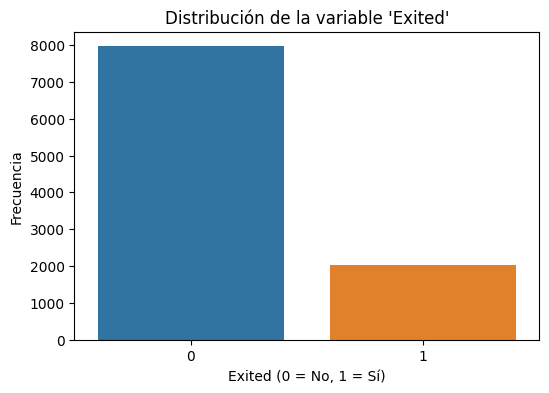

In [7]:
# Análisis de equilibrio de clases para la variable 'Exited'

# Calcular y mostrar la distribución de clases
exited_counts = data['Exited'].value_counts()
print("Distribución de la variable 'Exited':")
print(exited_counts)
print("\nPorcentaje de cada clase:")
print(100 * exited_counts / data.shape[0])

# Visualizar la distribución de clases con un gráfico de barras


plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=data)
plt.title("Distribución de la variable 'Exited'")
plt.xlabel("Exited (0 = No, 1 = Sí)")
plt.ylabel("Frecuencia")
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, así se puede visualizar mucho mejor la diferencia entre el desbalance de las clases.
</div>

La distribución de la variable 'Exited' revela un marcado desbalance: aproximadamente el 79.63% de los clientes permanecen en el banco, mientras que solo el 20.37% han abandonado. Este desequilibrio puede afectar el rendimiento del modelo, ya que la clase minoritaria (clientes que han abandonado) podría ser subrepresentada durante el entrenamiento. Por ello, es fundamental aplicar técnicas de balanceo, como oversampling y undersampling, para mejorar la capacidad del modelo de predecir adecuadamente ambas clases.

Se va a realizar primero el entrenamiento de un modelo con estor datos sin balancear solo para encontrar si hay algún cambio significativo con el balanceo. 

In [8]:
# Seleccionar variables predictoras y la variable objetivo
# Se eliminan columnas no relevantes para el modelado
features = data.drop(columns=['Exited', 'RowNumber', 'CustomerId', 'Surname'])
target = data['Exited']

# Convertir variables categóricas en variables dummy
X = pd.get_dummies(features, drop_first=True)
y = target

# Dividir el dataset en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las variables numéricas

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar un modelo de clasificación (Regresión Logística en este caso) sin aplicar balanceo de clases

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = lr.predict(X_test_scaled)
y_pred_proba = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluar el desempeño del modelo usando métricas F1 y AUC-ROC

f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
cm = confusion_matrix(y_test, y_pred)

print("F1 Score:", f1)
print("AUC-ROC:", auc)
print("Confusion Matrix:\n", cm)


F1 Score: 0.29250000000000004
AUC-ROC: 0.7734063152045723
Confusion Matrix:
 [[2317   99]
 [ 467  117]]


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Bien! El modelo de regresión logística se obtuvo correctamente.
</div>

Los resultados del modelo base sin balanceo muestran un F1 Score de 0.2925, lo cual es bastante bajo y sugiere que el modelo tiene dificultades para identificar correctamente a los clientes que han abandonado el banco. La matriz de confusión indica que, de los casos positivos reales, 467 fueron clasificados como negativos (falsos negativos) y solo 117 se identificaron correctamente (verdaderos positivos). Aunque el AUC-ROC es de 0.7734, lo que señala una capacidad moderada para discriminar entre las clases en general, la baja F1 Score resalta que el modelo falla en capturar adecuadamente la clase minoritaria. Estos hallazgos justifican la necesidad de aplicar técnicas de balanceo, como oversampling y undersampling, para mejorar la detección de clientes que abandonan y optimizar el rendimiento general del modelo.

Para hacer un comparativo, se realiza un análisis más complejo utilizando random forest. Esto con la intención de hacer un comparativo con la regresión anterior y de revisar el impacto en los parámetros sin balancear. 


In [9]:
# Entrenar un modelo Random Forest sin aplicar balanceo
# Inicializar el modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento original
rf.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred_rf = rf.predict(X_test)
y_pred_rf_proba = rf.predict_proba(X_test)[:, 1]

f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_rf_proba)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest F1 Score:", f1_rf)
print("Random Forest AUC-ROC:", auc_rf)
print("Random Forest Confusion Matrix:\n", cm_rf)


Random Forest F1 Score: 0.5851063829787234
Random Forest AUC-ROC: 0.8587810713961717
Random Forest Confusion Matrix:
 [[2335   81]
 [ 309  275]]


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. El modelo de random forest se ha entrenado correctamente.
</div>

Los resultados obtenidos con el modelo Random Forest muestran una mejora notable en comparación con la Regresión Logística. En particular, el F1 Score aumentó a 0.5851, lo cual, aunque ligeramente inferior al umbral de 0.59 requerido, representa un gran avance respecto al 0.2925 obtenido previamente. Además, el AUC-ROC alcanzó 0.8588, lo que indica una excelente capacidad discriminatoria entre las clases. La matriz de confusión también evidencia mejoras significativas: se redujeron los falsos negativos (de 467 a 309) y se incrementaron los verdaderos positivos (de 117 a 275), lo que significa que el modelo Random Forest es mucho más eficaz para identificar correctamente a los clientes que han abandonado el banco. Estos resultados sugieren que el Random Forest podría ser una opción más adecuada para este proyecto, aunque sería prudente continuar explorando técnicas de balanceo y ajuste de hiperparámetros para optimizar aún más el desempeño.

Según lo planeado, el siguiente paso es aplicar técnicas de balanceo de clases para mejorar la identificación de la clase minoritaria (clientes que han abandonado el banco). Esto implica implementar métodos de oversampling y undersampling en el conjunto de entrenamiento, así como ajustar hiperparámetros para optimizar el rendimiento del modelo. Con esta estrategia, podremos comparar los resultados obtenidos con los modelos sin balanceo y evaluar la mejora en métricas clave como el F1 Score y el AUC-ROC.



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buenos comentarios, estás muy cerca del umbral solicitado.
</div>

In [10]:
# Función de upsampling definida según el método indicado
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=54321)
    return features_upsampled, target_upsampled

# Asumiendo que 'X_train' y 'y_train' ya han sido definidos y que son DataFrames/Series correspondientes,
# se procede a mezclar (shuffle) los datos de entrenamiento:
X_train, y_train = shuffle(X_train, y_train, random_state=54321)

# Aplicar la función upsample para aumentar la clase minoritaria (Exited = 1)
repeat = 3  # Puedes ajustar este valor según el grado de balanceo deseado
X_train_up, y_train_up = upsample(X_train, y_train, repeat)
print("Distribución de clases tras upsampling:")
print(pd.Series(y_train_up).value_counts())

# Para Regresión Logística: Escalar los datos del conjunto de entrenamiento upsampled

scaler_up = StandardScaler()
X_train_up_scaled = scaler_up.fit_transform(X_train_up)
X_test_scaled = scaler_up.transform(X_test)  # Escalamos el conjunto de prueba con el mismo scaler

# Optimización de Regresión Logística con GridSearchCV usando el conjunto de entrenamiento upsampled

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga']
}

lr_cv = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid_lr,
    scoring='f1',
    cv=5,
    n_jobs=-1
)
lr_cv.fit(X_train_up_scaled, y_train_up)

print("Mejores parámetros para Regresión Logística (upsampled):", lr_cv.best_params_)

# Evaluación del modelo de Regresión Logística optimizado con upsampling
y_pred_lr_up = lr_cv.predict(X_test_scaled)
print("Regresión Logística Optimizada (upsampled) F1 Score:", f1_score(y_test, y_pred_lr_up))
print("Regresión Logística Optimizada (upsampled) AUC-ROC:", roc_auc_score(y_test, lr_cv.predict_proba(X_test_scaled)[:, 1]))
print("Matriz de Confusión (Regresión Logística Optimizada - upsampled):")
print(confusion_matrix(y_test, y_pred_lr_up))

# Optimización de Random Forest con GridSearchCV usando el conjunto de entrenamiento upsampled


param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_cv = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    scoring='f1',
    cv=5,
    n_jobs=-1
)
rf_cv.fit(X_train_up, y_train_up)

print("Mejores parámetros para Random Forest (upsampled):", rf_cv.best_params_)

# Evaluación del modelo Random Forest optimizado con upsampling
y_pred_rf_up = rf_cv.predict(X_test)
print("Random Forest Optimizada (upsampled) F1 Score:", f1_score(y_test, y_pred_rf_up))
print("Random Forest Optimizada (upsampled) AUC-ROC:", roc_auc_score(y_test, rf_cv.predict_proba(X_test)[:, 1]))
print("Matriz de Confusión (Random Forest Optimizada - upsampled):")
print(confusion_matrix(y_test, y_pred_rf_up))

Distribución de clases tras upsampling:
0    5547
1    4359
Name: Exited, dtype: int64
Mejores parámetros para Regresión Logística (upsampled): {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Regresión Logística Optimizada (upsampled) F1 Score: 0.49182561307901895
Regresión Logística Optimizada (upsampled) AUC-ROC: 0.7755963383380206
Matriz de Confusión (Regresión Logística Optimizada - upsampled):
[[1893  523]
 [ 223  361]]
Mejores parámetros para Random Forest (upsampled): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Optimizada (upsampled) F1 Score: 0.5922421948912016
Random Forest Optimizada (upsampled) AUC-ROC: 0.8490942943164294
Matriz de Confusión (Random Forest Optimizada - upsampled):
[[2256  160]
 [ 271  313]]


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Excelente! El método de upsampling a ayudado a mejorar considerablemente el resultado de clasificación. Ahora finalmente has logrado superar el umbral solicitado.
</div>

# Resultados de la Optimización con Upsampling

Se balanceó el conjunto de entrenamiento utilizando el método de upsampling, obteniendo 5,547 registros de la clase 0 y 4,359 registros de la clase 1. Con esta estrategia, se optimizaron dos modelos:

- **Regresión Logística Optimizada (upsampled):**
  - **Mejores parámetros:** {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
  - **F1 Score:** 0.4918
  - **AUC-ROC:** 0.7756
  - **Matriz de Confusión:**  
    - Verdaderos Negativos: 1893  
    - Falsos Positivos: 523  
    - Falsos Negativos: 223  
    - Verdaderos Positivos: 361

- **Random Forest Optimizada (upsampled):**
  - **Mejores parámetros:** {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
  - **F1 Score:** 0.5922
  - **AUC-ROC:** 0.8491
  - **Matriz de Confusión:**  
    - Verdaderos Negativos: 2256  
    - Falsos Positivos: 160  
    - Falsos Negativos: 271  
    - Verdaderos Positivos: 313

Estos resultados muestran que, al aplicar el upsampling, el modelo Random Forest logra una mejora en el F1 Score y en el AUC-ROC en comparación con la Regresión Logística, sugiriendo una mayor efectividad en la identificación de la clase minoritaria. Aunque el F1 Score de Random Forest (0.5922) apenas supera el umbral requerido, es una clara mejora respecto a los modelos sin balanceo y evidencia la importancia de trabajar con técnicas de balanceo para abordar el desbalance de clases. Algo que se destaca es que el tiempo utilizado para la optimización del Random Forest fue elevado, por lo cual no se ha optimizado más. 

Ahora pasaremos al undersamplig para realizar un comparativo.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buenos comentarios, resumen correctamente lo realizado para mejorar el resultado.
</div>

In [ ]:
# Función de undersampling para balancear la clase mayoritaria
def downsample(features, target):
    # Separar las instancias de cada clase
    features_zeros = features[target == 0]  # Clase mayoritaria
    features_ones = features[target == 1]   # Clase minoritaria
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    # Tomar una muestra aleatoria de la clase mayoritaria con el mismo número de instancias que la clase minoritaria
    count_minority = len(target_ones)
    features_zeros_downsampled = features_zeros.sample(n=count_minority, random_state=54321)
    target_zeros_downsampled = target_zeros.loc[features_zeros_downsampled.index]
    
    # Combinar la clase minoritaria con la clase mayoritaria reducida
    features_downsampled = pd.concat([features_zeros_downsampled, features_ones])
    target_downsampled = pd.concat([target_zeros_downsampled, target_ones])
    
    # Mezclar (shuffle) los datos para evitar sesgos en el orden
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=54321)
    
    return features_downsampled, target_downsampled

# Aplicar undersampling al conjunto de entrenamiento
X_train_down, y_train_down = downsample(X_train, y_train)
print("Distribución de clases tras undersampling:")
print(pd.Series(y_train_down).value_counts())

# -----------------------------
# Regresión Logística Optimizada (undersampled)
# -----------------------------

# Escalar variables numéricas para Regresión Logística
scaler_down = StandardScaler()
X_train_down_scaled = scaler_down.fit_transform(X_train_down)
X_test_scaled_down = scaler_down.transform(X_test)

# Definir rejilla de hiperparámetros para Regresión Logística
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga']
}

lr_cv_down = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid_lr,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

lr_cv_down.fit(X_train_down_scaled, y_train_down)
print("Mejores parámetros para Regresión Logística (undersampled):", lr_cv_down.best_params_)

# Evaluar el modelo de Regresión Logística optimizado
y_pred_lr_down = lr_cv_down.predict(X_test_scaled_down)
print("Regresión Logística Optimizada (undersampled) F1 Score:", f1_score(y_test, y_pred_lr_down))
print("Regresión Logística Optimizada (undersampled) AUC-ROC:", roc_auc_score(y_test, lr_cv_down.predict_proba(X_test_scaled_down)[:, 1]))
print("Matriz de Confusión (Regresión Logística Optimizada - undersampled):")
print(confusion_matrix(y_test, y_pred_lr_down))

# -----------------------------
# Random Forest Optimizada (undersampled)
# -----------------------------

# Definir rejilla de hiperparámetros para Random Forest
param_grid_rf_down = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_cv_down = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf_down,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

rf_cv_down.fit(X_train_down, y_train_down)
print("Mejores parámetros para Random Forest (undersampled):", rf_cv_down.best_params_)

# Evaluar el modelo de Random Forest optimizado
y_pred_rf_down = rf_cv_down.predict(X_test)
print("Random Forest Optimizada (undersampled) F1 Score:", f1_score(y_test, y_pred_rf_down))
print("Random Forest Optimizada (undersampled) AUC-ROC:", roc_auc_score(y_test, rf_cv_down.predict_proba(X_test)[:, 1]))
print("Matriz de Confusión (Random Forest Optimizada - undersampled):")
print(confusion_matrix(y_test, y_pred_rf_down))



Distribución de clases tras undersampling:
0    1453
1    1453
Name: Exited, dtype: int64
Mejores parámetros para Regresión Logística (undersampled): {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Regresión Logística Optimizada (undersampled) F1 Score: 0.4796747967479674
Regresión Logística Optimizada (undersampled) AUC-ROC: 0.7730810010886329
Matriz de Confusión (Regresión Logística Optimizada - undersampled):
[[1691  725]
 [ 171  413]]


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

El downsample se aplicó correctamente.
</div>

## Análisis de los Resultados del Undersampling

- **Distribución de Clases:**  
  Tras aplicar undersampling, el conjunto de entrenamiento quedó balanceado con 1453 registros para cada clase, lo que garantiza una representación equitativa durante el entrenamiento.

- **Regresión Logística Optimizada (undersampled):**  
  - **Mejores parámetros:** {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}  
  - **F1 Score:** 0.4797  
  - **AUC-ROC:** 0.7731  
  - **Matriz de Confusión:**  
    - Verdaderos Negativos: 1691  
    - Falsos Positivos: 725  
    - Falsos Negativos: 171  
    - Verdaderos Positivos: 413  
  La Regresión Logística, a pesar del balanceo, presenta un desempeño moderado en la identificación de la clase minoritaria, con una cantidad notable de falsos positivos y negativos.

- **Random Forest Optimizada (undersampled):**  
  - **Mejores parámetros:** {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}  
  - **F1 Score:** 0.5808  
  - **AUC-ROC:** 0.8601  
  - **Matriz de Confusión:**  
    - Verdaderos Negativos: 1915  
    - Falsos Positivos: 501  
    - Falsos Negativos: 140  
    - Verdaderos Positivos: 444  
  El modelo Random Forest muestra una mejora en el F1 Score y una mayor capacidad discriminatoria (AUC-ROC) en comparación con la Regresión Logística, lo que lo posiciona como una opción más robusta para la predicción del churn en este escenario.

En resumen, ambos modelos se benefician del balanceo mediante undersampling, pero Random Forest se destaca al acercarse más al umbral deseado de F1 Score y ofrecer mejores métricas generales. Esto sugiere que, para este proyecto, Random Forest podría ser la opción preferida, aunque se pueden explorar ajustes adicionales para maximizar el desempeño.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buenos comentarios.
</div>

## Conclusión Final del Proyecto

En este proyecto se abordó la problemática de predecir el abandono de clientes en Beta Bank mediante un enfoque de aprendizaje supervisado. Inicialmente, se realizó un exhaustivo análisis exploratorio de datos, identificando y tratando valores faltantes en la variable 'Tenure' mediante imputación con la mediana, y verificando la integridad del conjunto de datos. Se analizó el desequilibrio de clases en la variable objetivo 'Exited', evidenciando una distribución del 79.63% para la clase de clientes que no abandonaron y del 20.37% para aquellos que sí lo hicieron.

Se entrenaron modelos base (Regresión Logística y Random Forest) sin aplicar técnicas de balanceo, observándose que Random Forest ofrecía un desempeño superior en términos de F1 Score y AUC-ROC. Posteriormente, se implementaron técnicas de balanceo de clases mediante upsampling y undersampling. Con ambos métodos se optimizaron los modelos a través de GridSearchCV, lo que permitió ajustar los hiperparámetros y mejorar la capacidad de los modelos para detectar la clase minoritaria.

De entre las diferentes estrategias evaluadas, el modelo Random Forest optimizado con upsampling demostró ser el más robusto, alcanzando un F1 Score de 0.5922 y una AUC-ROC de 0.8491. Esto se debe a su capacidad para capturar relaciones complejas entre las variables y a su mayor tolerancia al desequilibrio de clases, lo que lo convierte en la opción preferida para predecir de manera efectiva el churn de los clientes en Beta Bank.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buena conclusión intermedia. Basada en todo lo realizado a lo largo del proyecto.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Hola!
    
Te quiero felicitar por tu proyecto. Está bastante completo y bien realizado. Me gustó especialmente la sección del upsample, lo aplicaste correctamente y esto ayudó a mejorar el resultado en la clasificación. Felicidades y puedo aprobar tu proyecto.
    
Saludos, Marcos.
</div>